# Esercitazione 9: soluzione del problema del commesso viaggiatore tramite un algoritmo genetico

Il problema del commesso viaggiatore consiste in un commesso e un insieme di $N$ città con posizioni $\vec{c}_i$. Il commesso **deve visitare ciascuna delle città partendo da una determinata città (ad esempio la città natale) e tornando alla stessa città**. Il problema è che il commesso vuole **minimizzare la lunghezza totale del viaggio**.

Consideriamo ora la sequenza ordinata di città, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, che va dalla città 1 alla città n-esima. Il percorso che minimizza la seguente funzione costo:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

oppure 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

dove la sequenza $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N$ (con $\vec{x}_{N+1}=\vec{x}_1$) è una particolare permutazione, P, della sequenza ordinata delle città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, cioè

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Si noti inoltre che qualsiasi permutazione particolare della sequenza ordinata delle città può essere ottenuta dalla combinazione di molte permutazioni semplici tra coppie di città.

Possiamo esprimere un percorso possibile tramite un vettore 1D i cui elementi, dal primo all'ultimo, sono interi che rappresentano le città nell'ordine in cui il commesso le visiterebbe; ad esempio per $N=5$ città un percorso possibile è rappresentato dal vettore:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$


### Per eseguire il codice c++, lanciare il seguente comando bash:

make && mpiexec -np 4 main.exe


## <span style="color:blue">Cammino più breve che unisce città poste su di una circonferenza.</span>

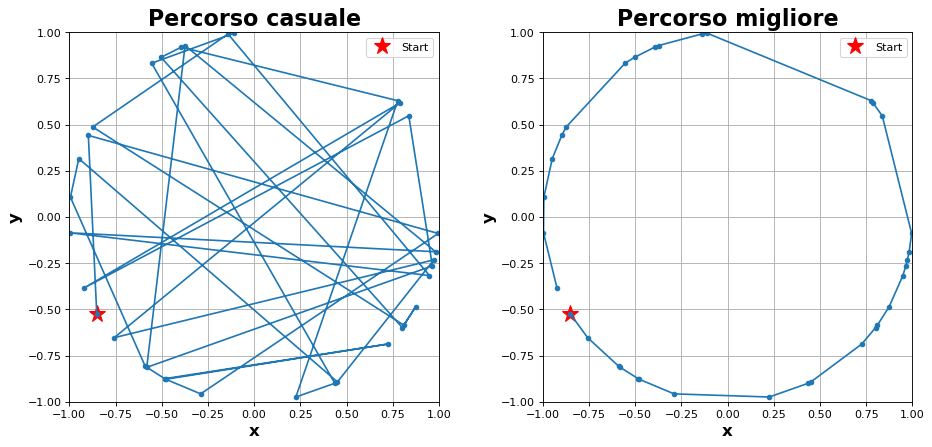

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["0","1"]
tipo = ["casuale","migliore"]


for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("risultati/cerchio"+gen[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

   # rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    #plt.gca().add_patch(rectangle)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()

## <span style="color:blue">Convergenza della fitness nel caso di punti su una circonferenza</span>


### Disegno il grafico della lunghezza dei cammini trovati (migliore, e media sulla metà migliore della popolazione) in ciascuna generazione.

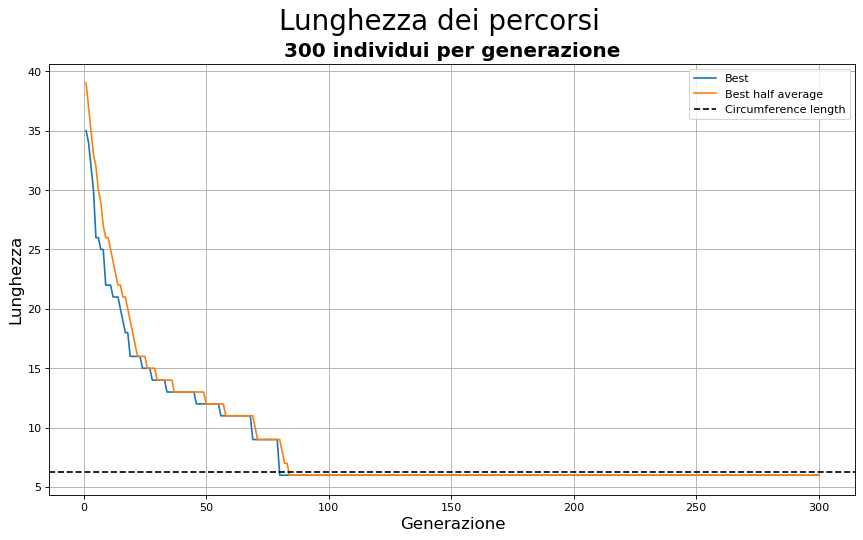

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

generazioni=300

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =[str(generazioni), "1000"]

for i in range(0,1):
    #plt.subplot(2,1,i+1)
    best = np.loadtxt("risultati/miglioriCerchio.txt", usecols=(0), unpack='true')
    gen= np.linspace(1,len(best),len(best))
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("risultati/migliori_semimediaCerchio.txt", usecols=(0), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=2*np.pi, color = 'k', linestyle = '--', label = "Circumference length")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()



## <span style="color:blue">Miglior cammino tra punti in un quadrato</span>


### Cammino più breve che unisce città in un quadrato.

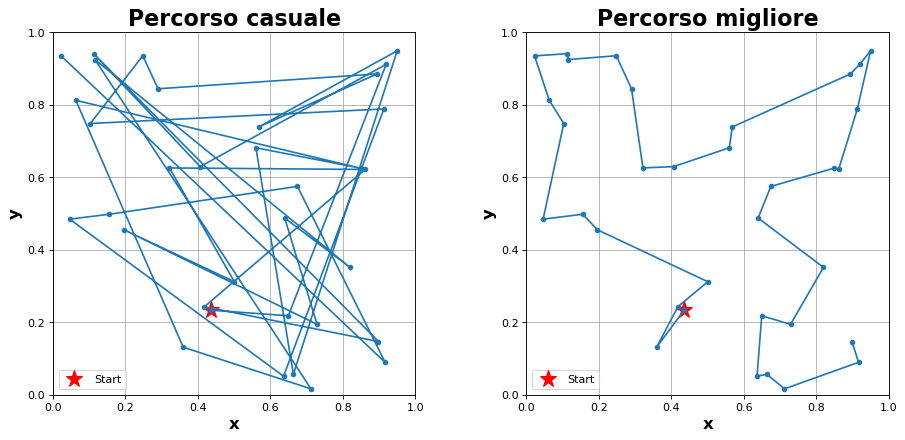

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["0","1"]
tipo = ["casuale","migliore"]

for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("risultati/quadrato"+gen[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

   # rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    #plt.gca().add_patch(rectangle)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()

## <span style="color:blue">Convergenza della fitness nel caso di punti in un quadrato</span>


### Disegno il grafico della lunghezza dei cammini trovati (migliore, e media sulla metà migliore della popolazione) in ciascuna generazione.

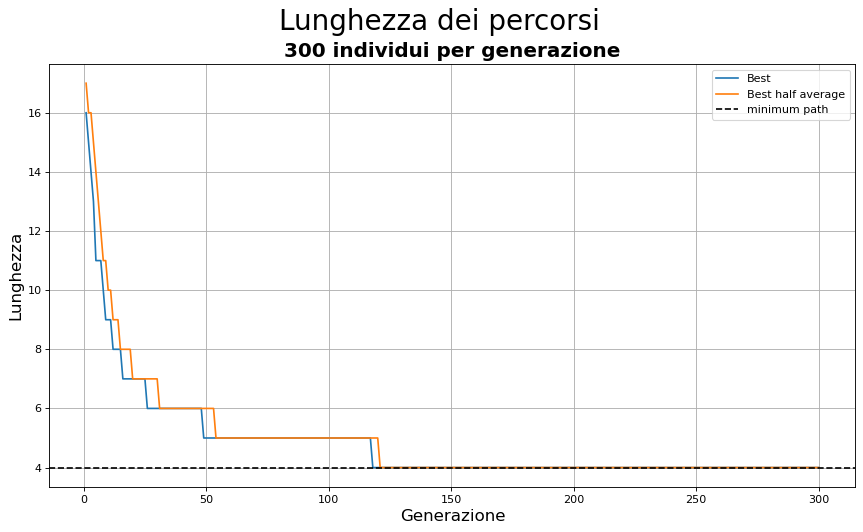

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300", "1000"]

for i in range(0,1):
    #plt.subplot(2,1,i+1)
    best = np.loadtxt("risultati/miglioriQuadrato1.txt", usecols=(0), unpack='true')
    gen= np.linspace(1,len(best),len(best))
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("risultati/migliori_semimediaQuadrato1.txt", usecols=(0), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=min(best), color = 'k', linestyle = '--', label = "minimum path")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()



## <span style="color:blue">Convergenza della fitness con e senza migrazioni</span>


### Confronto cosa succede se scambio gli elementi migliori tra i vari thread, oppure li lascio indipendenti.

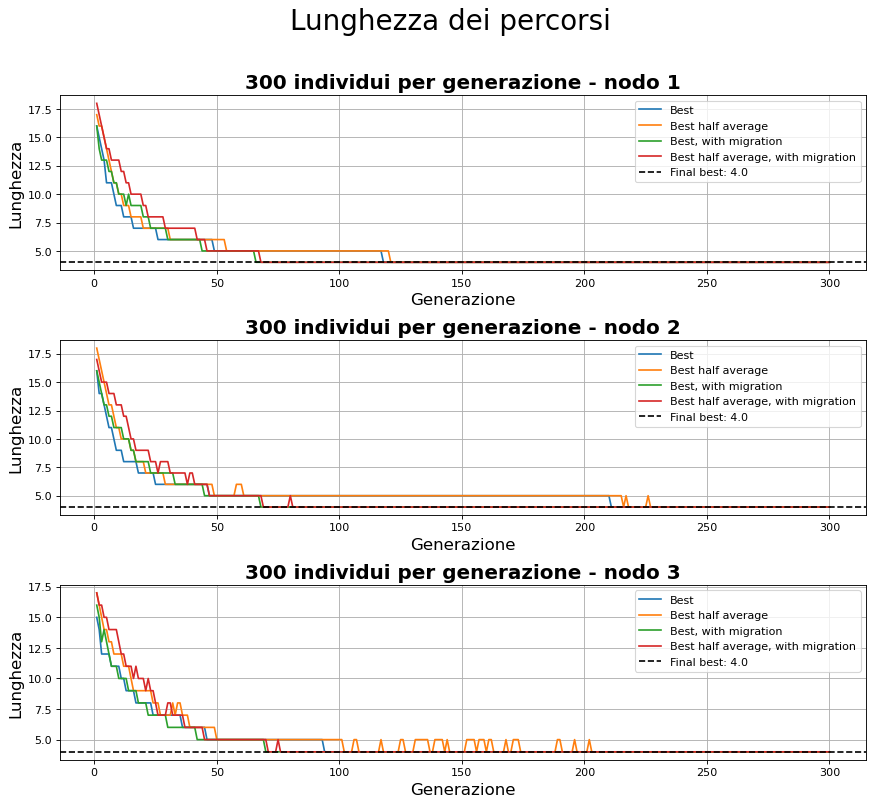

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

popolazione=300

figure(figsize=(13, 11), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

rank =["1", "2", "3"]

for i in range(0,3):
    # using rank[i] individuals per generation
    plt.subplot(3,1,i+1)
    gen= np.linspace(1,len(best),len(best))
    best = np.loadtxt("risultati/miglioriQuadrato"+rank[i]+".txt", usecols=(0), unpack='true')
    bestave = np.loadtxt("risultati/migliori_semimediaQuadrato"+rank[i]+".txt", usecols=(0), unpack='true')
    mbest = np.loadtxt("risultati/migrazionimiglioriQuadrato"+rank[i]+".txt", usecols=(0), unpack='true')
    mbestave = np.loadtxt("risultati/migrazionimigliori_semimediaQuadrato"+rank[i]+".txt", usecols=(0), unpack='true')
    
    plt.plot(gen, best, marker = "", label = "Best") 
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.plot(gen, mbest, marker = "", label = "Best, with migration") 
    plt.plot(gen, mbestave, marker = "", label = "Best half average, with migration") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title(str(popolazione)+' individui per generazione - nodo '+rank[i], fontsize = 18, fontweight = "bold")
    plt.axhline(y=min(best), color = "k", linestyle = "--", label = "Final best: "+str(min(best)))
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()


### L'andamento osservato suggerisce che introdurre le migrazioni non necessariamente renda più rapido il raggiungimento della soluzione in un primo momento, dato che la dimensione del bacino genico risulta quadruplicata. Questo però fa sì che in questo contesto la soluzione, una volta trovata, è mantenuta in modo più stabile. In tal senso le migrazioni stabilizzano il sistema attorno alla soluzione. 

## <span style="color:blue">Cammini migliori senza le migrazioni</span>

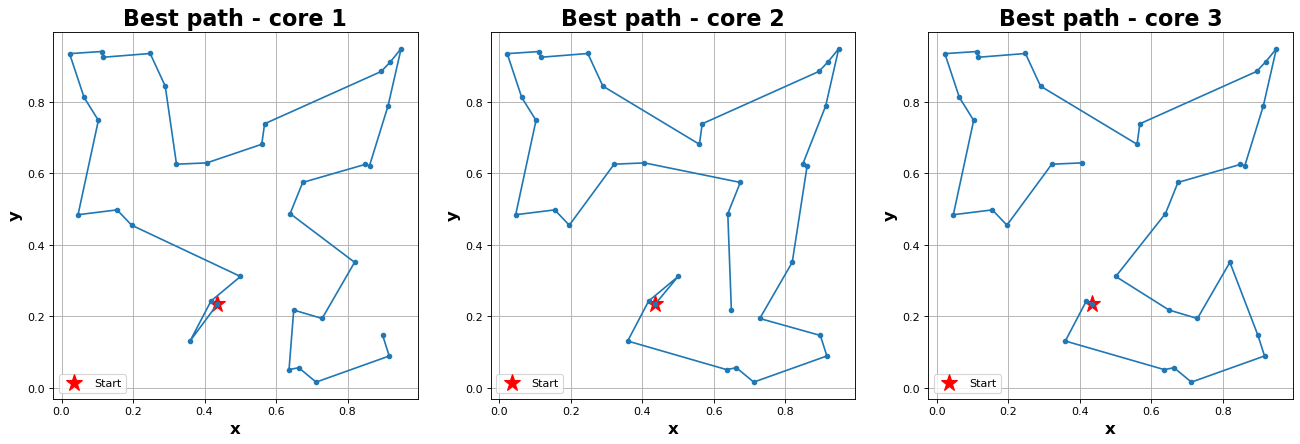

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(20,10), dpi=80)

for i in range(0,3):
    plt.subplot(1,3,i+1)
    x,y = np.loadtxt("risultati/quadrato"+rank[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Best path - core '+str(i+1), fontsize = 20, fontweight = "bold")
    plt.legend()

    plt.gca().set_aspect('equal', adjustable='box')

plt.show()



### osservo che il cammino migliore trovato in generale differisce tra un thread e l'altro.

## <span style="color:blue">Cammini migliori con le migrazioni</span>

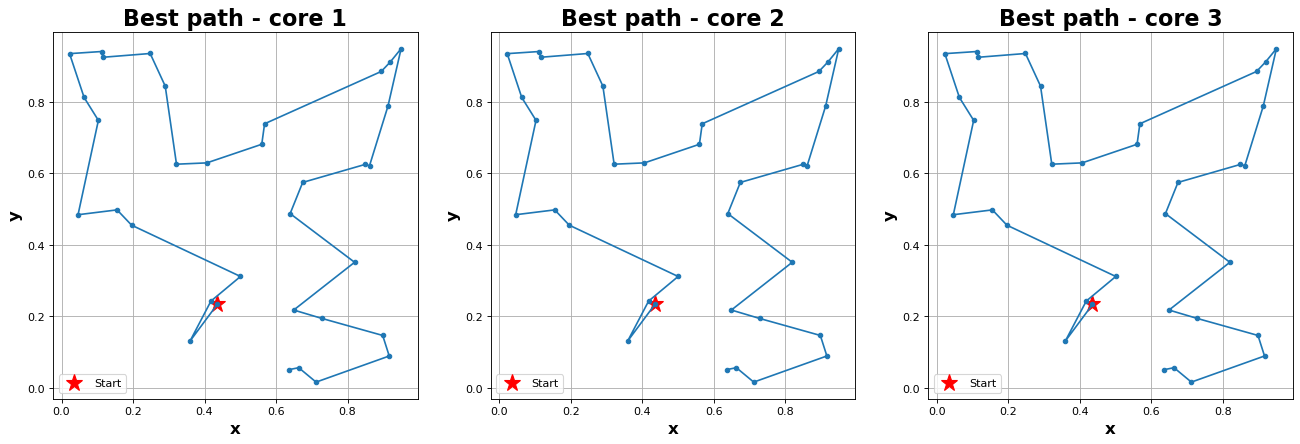

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(20,10), dpi=80)

for i in range(0,3):
    plt.subplot(1,3,i+1)
    x2,y2 = np.loadtxt("risultati/migrazioniquadrato"+rank[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x2, y2, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Best path - core '+str(i+1), fontsize = 20, fontweight = "bold")
    plt.legend()

    plt.gca().set_aspect('equal', adjustable='box')

plt.show()



### Osservo che l'introduzione delle migrazioni ha permesso di scambiare spesso gli stessi individui migliori tra thread differenti, di conseguenza l'individuo migliore è ora lo stesso per tutti.

# Nota: nel c++ (riga 183, 188) ho usato su ambo i thread un comando Send e subito dopo un comando Receive, per scambiare cammini fra due thread. Questo è pericoloso, può condurre a un deadlock, se il vettore da scambiare è grande: infatti un thread inizia a spedire, l'altro pure, essendo entrambi impegnati a spedire nessuno fa tempo a ricevere che si riempie il buffer. È più sicuro o farlo in due processi diversi, oppure lanciare prima il receive, così intanto ciascun thread si mette in ascolto, e solo successivamente il send. Forse è per questo che i cammini migranti arrivavano menomati (cosa che in effetti ho risolto cambiando la precisione del dato trasmesso da MPI_INT a MPI_DOUBLE, anche se in effetti sto trasferendo vettori di interi).